# What we need are the configurations of arranging 8 queens in 8 X 8 chessboard using Simulated Annealing and Gibbs Sampling.

To minimize the computational complexity We can assime that a queen can travel in rows only, and each queen wil be assigned a particular row.

In the begining the Queens will start at random spots to their allocated rows.

So taking the coloumn positions of each queen as states, example:

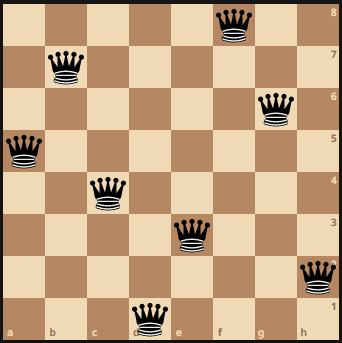

Will be stated as:
[ 6,2,7,1,3,5,8,4 ]

(Image is taken from lichess.com)


# Code


---



Importing all the packages needed.

In [ ]:
import numpy as np
import math as mt

# this package is just for clearing the screen
from os import system

# Due to some runtime issues I have declared this list of no attack configurations here as a global variable
global safe_config
safe_config = []

This display method displays the positions dictated by state provided to it in a 8X8 chessboard like display.

In [ ]:
def display(s):
  # This is simply to represent the positions on the chessboard
  # We get the state s which is a set of the column positions of each queen

  # Blank Chessboard
  chessboard = np.empty((8, 8), str)

  # If the position is encountered then we print "1" else "_"
  for i in range(8):
    for j in range(8):
      if j == s[i]:
        chessboard[i][j] = "1"
      else:
        chessboard[i][j] = "_"

  print()
  # This helps to display in a relatable form
  print ("   1 2 3 4 5 6 7 8")
  print (" __________________")
  for i in range(8):
    print(str(i),end="| ")
    for j in range(8):
      print(chessboard[i][j],end=" ")

    print()



Now we need to define a cost function so that we can call whenver we want. The cost here will simply be the number of conflicts possible, (designed such that there is no recounting)

In [ ]:
def danger(s):
  # This method counts the number of clashes possible overall
  # also we need to make sure we are not computing for the same queen by using "i!=j"
  total = 0

  for i in range(8):
    for j in range(i+1,8):
      # Occurances in same coloumn
      if (s[i] == s[j]) and (i!=j) :
        total+=1

      # Diagonal threats
      if (abs(s[i]-s[j]) == abs(i-j)) and (i!=j):
        total+=1

  return total

This method is used to find the next intermediate state using Gibbs sampling.

In [ ]:
def gibbs(s,j):

  # Using a copy of the array
  s1 = s

  # The distribution is formed using the total attacks faced by the queen at each spot in the row

  # Preparing a blank distribution
  dist = np.array([0,0,0,0,0,0,0,0])

  # The number of threats the queen faces in its current position
  d = danger(s)

  # Now computing the number of threats faced in each coloumn position and storing that as a distribution in dist
  for i in range(8):
    s1[j] = i
    dist[i] = danger(s1)

  # Here is the main part of this sampling

  # If the number of threats faced by the queen is more that it current faces, then its not probable to move to that coloumn
  # If found then the pmf is set to 0 for thta coloumn

  # If the number of threats faced by the queen is less that it current faces, then its more probable to move to that coloumn
  # Lesser the threats more its preffered so that is plotted as a non zero pmf in dist

  # Just like say for a 2 variable problem for onw fixed variable a random sample is taken from the resultant pmf in Gibbs similarly
  # For a particular combination of other 7 queens the danger pfm curve is used here
  for i in range(8):
    if (dist[i]>=d):
      # More danger so not considered
      dist[i] = 0
    else:
      # Less danger so considered
      dist[i] = d - dist[i]

  # Since its a probability distribution we need to normalize it
  norm_dist = dist / np.sqrt(np.sum(dist**2))

  # Randomly selecting an index
  nxt_ind = np.random.randint(0, 8)

  # We keep re-selecting in case we select a point not on pmf an since we can move a queen anywhere with equal probabilty I uesd randint()
  while (norm_dist[nxt_ind] == 0):
    nxt_ind = np.random.randint(0, 8)

  # Since now we have a random sample from the pmf I update that and return the new configuration
  s1[j]  = nxt_ind
  return s1

This method fascilitates the allotment of a new state based on Gibbs sampling

In [ ]:
def newState(sn):

  # For every simulated annealing iteration the new state is chosen by the Gibbs sampling MCMC algorithm
  sns = sn

  # p(x_0|x_1)   -->   p(x'_0|x_1)
  # Every ith iteration I am using the i-1 queen's updated positions
  for i in range(8):
    intermediate_state = gibbs(sns,i)
    sns = intermediate_state

  # Returning the final state
  return sns

This method simply helps store the no conflict configurations encountered during the process.

In [ ]:
def geter (st):
  # This is used to store the configurations of no conflict
  # I had to use another array to extract or else the address was getting used
  arr = []

  # Adding 1 since the positions are array indexes
  for i in range(8):
    arr.append(st[i]+1)

  # Storing the config in bzz array
  safe_config.append(arr)

## Start of the driver code

(Variable declarations and initializations)

In [ ]:
# Declaring all the variables and contsnts we need in the code here itself
state = [0,0,0,0,0,0,0,0]
new_state = [0,0,0,0,0,0,0,0]
cost = 0
new_cost = 0

# The initial distribution of the queens on the chessboard randomly assigned.
for i in range(8):
  state[i] = np.random.randint(0, 8)

print ("The initial Placement")
print ([x+1 for x in state])
display(state)

The initial Placement
[4, 4, 8, 1, 1, 8, 4, 1]

   1 2 3 4 5 6 7 8
 __________________
0| _ _ _ 1 _ _ _ _ 
1| _ _ _ 1 _ _ _ _ 
2| _ _ _ _ _ _ _ 1 
3| 1 _ _ _ _ _ _ _ 
4| 1 _ _ _ _ _ _ _ 
5| _ _ _ _ _ _ _ 1 
6| _ _ _ 1 _ _ _ _ 
7| 1 _ _ _ _ _ _ _ 


## The main driving code

In [ ]:
# The variables for recently discovered minima
store_min = np.array([0,0,0,0,0,0,0,0])
min_cost = danger(state)

# count is used to stre the number of times we get no conflict configurations
count = 0

# Variables for simulated annealing
trial = 1
T = 1000

# cooling rate of T
alpha = 0.9


# Taking an initial cost value
cost = danger(state)

while trial <= 10000:
  # Now since we want to try different paths we will change by swapping elements between two indexes m and n
  new_state = newState(state)
  new_cost = danger(new_state)

  # This portion of the code is just to capture and store the no attacks configurations found in the process
  # It has no effect on the process variables or course
  if new_cost == 0:
    count+=1
    geter(new_state)

  if new_cost <= cost:
    # We difinitely shift to next point if there is smaller total distance (cost)
    state = new_state
    cost = new_cost

    # All is good we found a smaller value but is it the global minima?
    if new_cost<= min_cost:
      min_cost = new_cost
      for i in range(8):
        store_min[i] = new_state[i]
  else:
    # Else We shift to next point probabilistically
    if np.random.randn() < mt.exp(-(new_cost - cost)/T):
      if(cost == 0):
        state = new_state
        cost = new_cost

  T = alpha*T
  trial += 1

# Now the simple printing part

system('clear')
print()
print("Final Configuration :")
print ("Final coloumn configuration : "+str([x+1 for x in store_min]))
print()
print ("Minimum Cost : "+str(min_cost))
print()
display(store_min)






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide



Final Configuration :
Final coloumn configuration : [7, 3, 8, 2, 5, 1, 6, 4]

Minimum Cost : 0


   1 2 3 4 5 6 7 8
 __________________
0| _ _ _ _ _ _ 1 _ 
1| _ _ 1 _ _ _ _ _ 
2| _ _ _ _ _ _ _ 1 
3| _ 1 _ _ _ _ _ _ 
4| _ _ _ _ 1 _ _ _ 
5| 1 _ _ _ _ _ _ _ 
6| _ _ _ _ _ 1 _ _ 
7| _ _ _ 1 _ _ _ _ 


## Now for the number of such solutions or minimas found during this process.
(Varies each time the program is run)

In [ ]:
print("Total number of No attack configurations found during search :"+str(count))
print()

for i in range(1,count+1):
  print("Configuration : "+str(i))
  print(safe_config[i-1])
  display(safe_config[i-1])
  print()

Total number of No attack configurations found during search :10

Configuration : 1
[4, 7, 5, 3, 1, 6, 8, 2]

   1 2 3 4 5 6 7 8
 __________________
0| _ _ _ _ 1 _ _ _ 
1| _ _ _ _ _ _ _ 1 
2| _ _ _ _ _ 1 _ _ 
3| _ _ _ 1 _ _ _ _ 
4| _ 1 _ _ _ _ _ _ 
5| _ _ _ _ _ _ 1 _ 
6| _ _ _ _ _ _ _ _ 
7| _ _ 1 _ _ _ _ _ 

Configuration : 2
[5, 8, 4, 1, 3, 6, 2, 7]

   1 2 3 4 5 6 7 8
 __________________
0| _ _ _ _ _ 1 _ _ 
1| _ _ _ _ _ _ _ _ 
2| _ _ _ _ 1 _ _ _ 
3| _ 1 _ _ _ _ _ _ 
4| _ _ _ 1 _ _ _ _ 
5| _ _ _ _ _ _ 1 _ 
6| _ _ 1 _ _ _ _ _ 
7| _ _ _ _ _ _ _ 1 

Configuration : 3
[3, 6, 2, 5, 8, 1, 7, 4]

   1 2 3 4 5 6 7 8
 __________________
0| _ _ _ 1 _ _ _ _ 
1| _ _ _ _ _ _ 1 _ 
2| _ _ 1 _ _ _ _ _ 
3| _ _ _ _ _ 1 _ _ 
4| _ _ _ _ _ _ _ _ 
5| _ 1 _ _ _ _ _ _ 
6| _ _ _ _ _ _ _ 1 
7| _ _ _ _ 1 _ _ _ 

Configuration : 4
[3, 6, 2, 7, 1, 4, 8, 5]

   1 2 3 4 5 6 7 8
 __________________
0| _ _ _ 1 _ _ _ _ 
1| _ _ _ _ _ _ 1 _ 
2| _ _ 1 _ _ _ _ _ 
3| _ _ _ _ _ _ _ 1 
4| _ 1 _ _ _ _ _ _ 
5| _ _ _ _ 1 _ _ _ 